In [13]:
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

mlflow.autolog(
    log_input_examples=False,
    log_model_signatures=True,
    log_models=True,
    disable=True,
    exclusive=True,
    disable_for_unsupported_versions=True,
    silent=True
)

StatementMeta(, ff9ca089-49eb-4610-bda2-0e683c2c23bc, 15, Finished, Available, Finished)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

StatementMeta(, ff9ca089-49eb-4610-bda2-0e683c2c23bc, 10, Finished, Available, Finished)

In [9]:
# Charger le dataset Iris
iris = datasets.load_iris()
X = iris.data  # Les caractéristiques (features)
y = iris.target  # Les étiquettes (labels)

# Séparer le dataset en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les caractéristiques (centrer et réduire)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

StatementMeta(, ff9ca089-49eb-4610-bda2-0e683c2c23bc, 11, Finished, Available, Finished)

In [10]:
# Initialiser MLFlow
mlflow.set_experiment("iris-classification-experiment")

StatementMeta(, ff9ca089-49eb-4610-bda2-0e683c2c23bc, 12, Finished, Available, Finished)

<Experiment: artifact_location='', creation_time=1721382127421, experiment_id='17b1cdea-aeda-4516-ac7d-794850efc4f0', last_update_time=None, lifecycle_stage='active', name='iris-classification-experiment', tags={}>

In [11]:
print(f"MLFlow Tracking URI: {mlflow.get_tracking_uri()}")

StatementMeta(, ff9ca089-49eb-4610-bda2-0e683c2c23bc, 13, Finished, Available, Finished)

MLFlow Tracking URI: sds://pbipfracen1-francecentral.pbidedicated.windows.net/webapi/capacities/441d26c6-b16e-4204-95f6-9754f19a9d16/workloads/ML/ML/Automatic/workspaceid/e1c85901-4ccf-463f-948d-5017c50e0257/


StatementMeta(, ff9ca089-49eb-4610-bda2-0e683c2c23bc, 17, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'iris-classifier-model' already exists. Creating a new version of this model...
2024/07/19 10:52:42 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: iris-classifier-mo

Coefficients de la régression logistique:
[[-1.00316768  1.14456076 -1.81255767 -1.69176083]
 [ 0.52785456 -0.28289055 -0.34085076 -0.71984718]
 [ 0.47531311 -0.8616702   2.15340842  2.41160801]]


Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



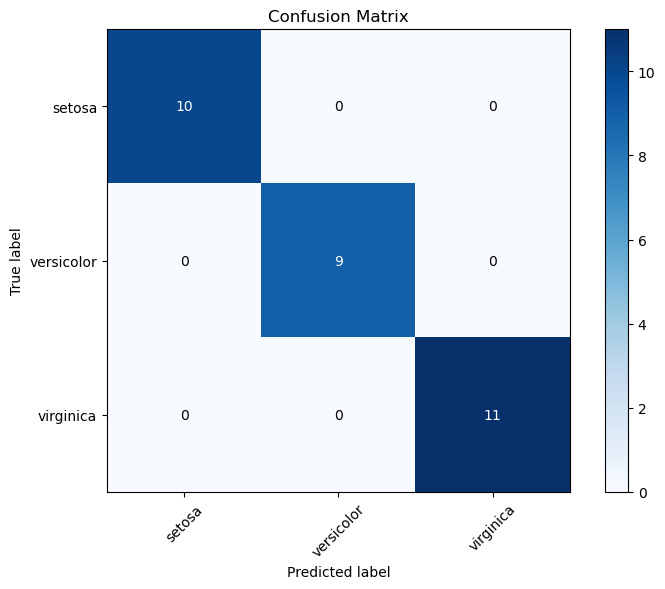

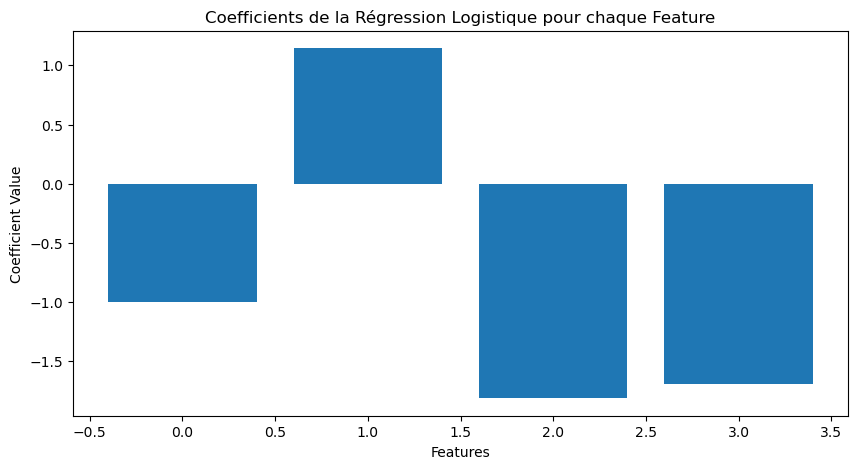

In [15]:
with mlflow.start_run():
    # Hyperparamètres
    max_iter = 200

    # Créer un modèle de régression logistique
    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)

    # Prédire les étiquettes pour l'ensemble de test
    y_pred = model.predict(X_test)

    # Évaluer la performance du modèle
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Enregistrer les hyperparamètres et les métriques dans MLFlow
    mlflow.log_param("max_iter", max_iter)
    mlflow.log_metric("accuracy", accuracy)
    for label, metrics in class_report.items():
        if isinstance(metrics, dict):
            for metric_name, metric_value in metrics.items():
                mlflow.log_metric(f"{label}_{metric_name}", metric_value)

    # Enregistrer la matrice de confusion comme une image
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)

    fmt = 'd'
    thresh = conf_matrix.max() / 2.
    for i, j in np.ndindex(conf_matrix.shape):
        plt.text(j, i, format(conf_matrix[i, j], fmt),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # Enregistrer le modèle entraîné
    signature = infer_signature(
        X_train, y_pred
    )

    model_name = "iris-classifier-model"

    mlflow.sklearn.log_model(
            model,
            model_name,
            signature=signature,
            registered_model_name=model_name
    )

    # Affichage des coefficients de la régression logistique
    print("Coefficients de la régression logistique:")
    print(model.coef_)

    # Afficher les coefficients sous forme graphique
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(model.coef_[0])), model.coef_[0])
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.title('Coefficients de la Régression Logistique pour chaque Feature')
    plt.savefig("coefficients.png")
    mlflow.log_artifact("coefficients.png")

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))
